# <center>Customer Analytics</center>

### It containes three parts:
##### 1.Segmentation of Customers 
##### 2.Analysis of the Segmented Customers
##### 3.Predictive Analysis
##### &emsp;  3.1 Price Elasticity of Purchase Probability
##### &emsp;  3.2 Price Elasticity of Brand Choice Probability
##### &emsp;  3.3 Price Elasticity of Purchase Quantity 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from scipy.cluster.hierarchy  import dendrogram,linkage

In [4]:
from sklearn.cluster import KMeans

In [5]:
from sklearn.decomposition import PCA

In [6]:
import pickle

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### Import Data

![image.png](./docs/img/image1.png)

# <center>Customer Segementation</center>

## Customer Data

In [9]:
df=pd.read_csv('segmentation data.csv')

In [10]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### EDA

In [11]:
df.shape

(2000, 8)

In [12]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [13]:
df.drop('ID',axis=1,inplace=True)

In [14]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [15]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


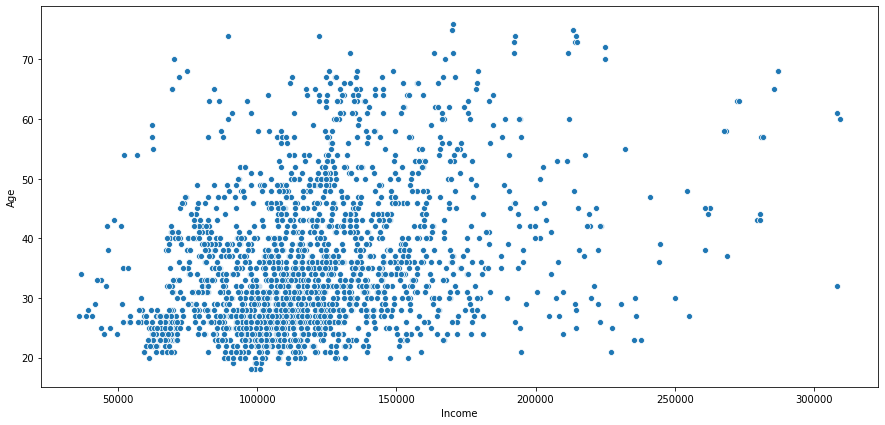

In [16]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Income',y='Age',data=df)

### Scaling The Data 

In [17]:
sc=StandardScaler()

In [18]:
x=df
x.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [19]:
x_standard=sc.fit_transform(x)
x_standard

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## Applying Clustering Techniques 

### Hierarchical Clustering

In [20]:
hier_cluster=linkage(x_standard,method='ward')

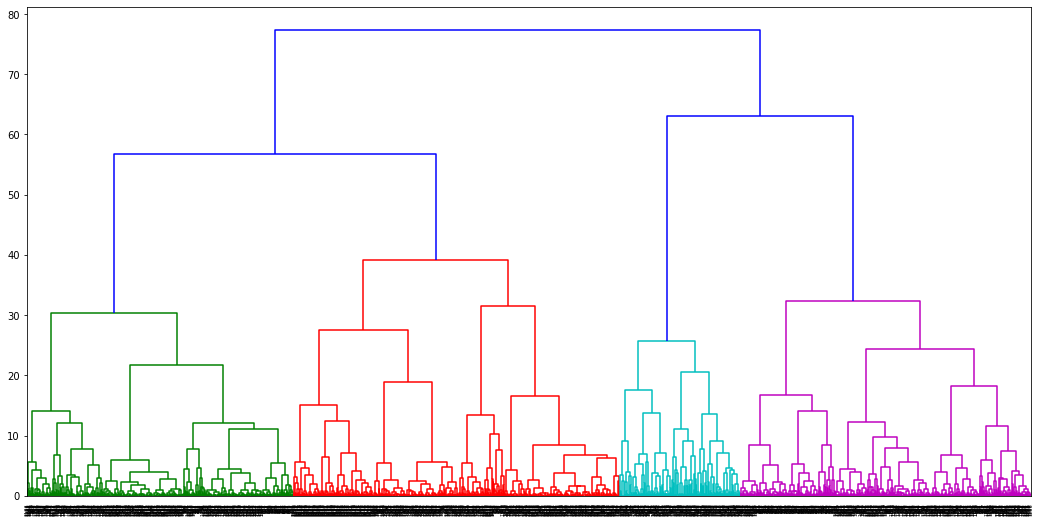

In [21]:
plt.figure(figsize = (18,9))
dendrogram(hier_cluster)
plt.show()

### KMeans Clustering

In [22]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(x_standard)
    a=km.inertia_
    sse.append(a)

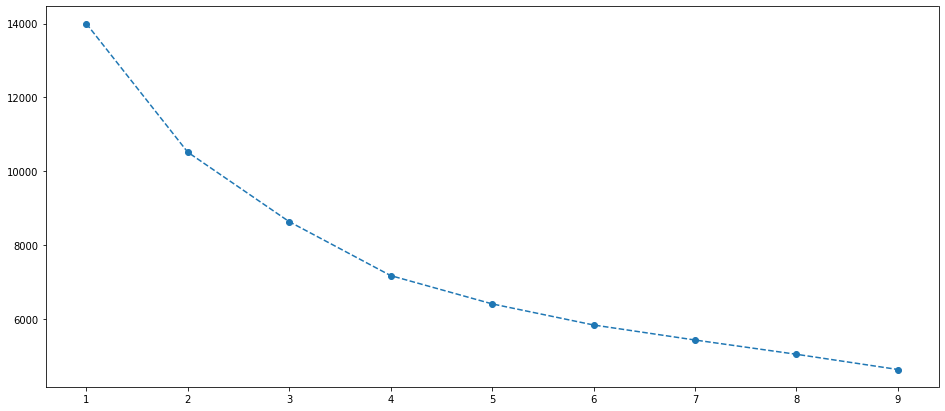

In [23]:
p=range(1,10)
plt.figure(figsize=(16,7))
plt.plot(p,sse,marker = 'o', linestyle = '--')
plt.show()

### It can be seen from the graph that min cluster is 4. 

In [24]:
km=KMeans(n_clusters=4)
prediction=km.fit_predict(x_standard)

In [25]:
km_normal=df.copy()

In [26]:
km_normal['cluster']=prediction

In [27]:
km_normal.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


In [28]:
df1=km_normal[km_normal['cluster']==0]
df2=km_normal[km_normal['cluster']==1]
df3=km_normal[km_normal['cluster']==2]
df4=km_normal[km_normal['cluster']==3]

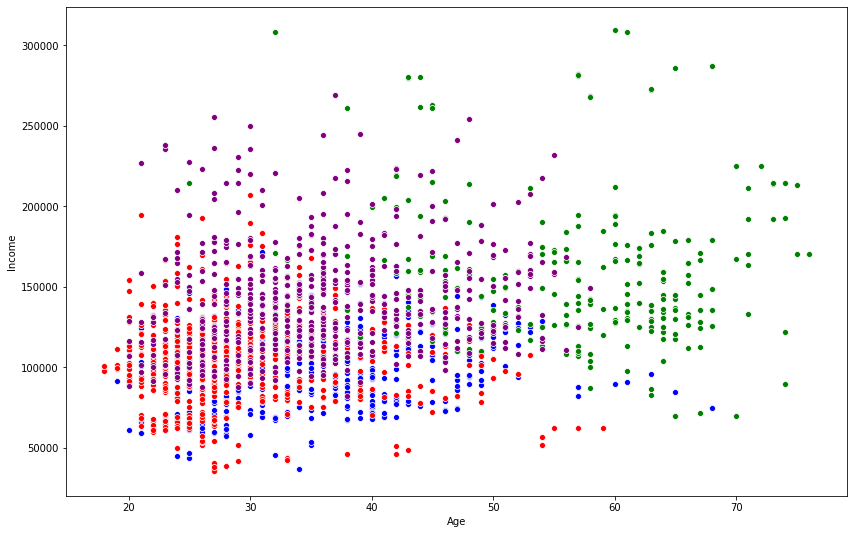

In [29]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Age',y='Income',data=df1,color='blue')
sns.scatterplot(x='Age',y='Income',data=df2,color='green')
sns.scatterplot(x='Age',y='Income',data=df3,color='red')
sns.scatterplot(x='Age',y='Income',data=df4,color='purple')
plt.show()

Mostly the segments are overlapping

## PCA

In [30]:
pca=PCA()

In [31]:
pca.fit(x_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Checking how many features to select

In [32]:
var=pca.explained_variance_ratio_
var

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

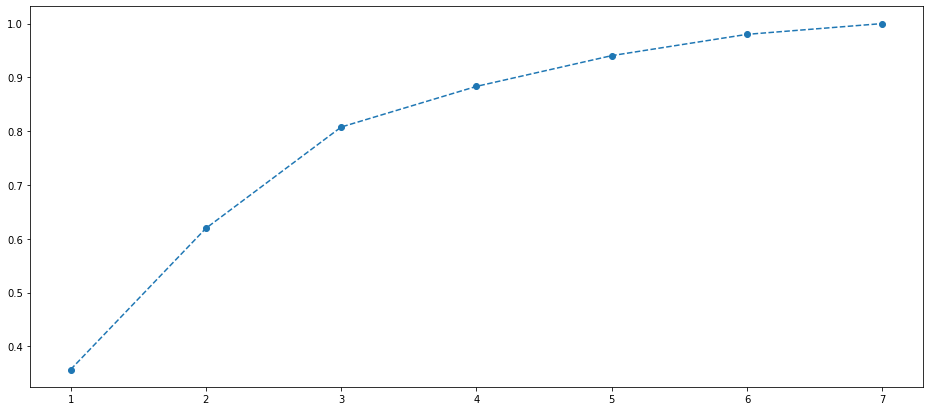

In [33]:
p=range(1,8)
plt.figure(figsize=(16,7))
plt.plot(p,var.cumsum(),marker = 'o', linestyle = '--')
plt.show()

In [34]:
pca=PCA(n_components=3)

In [35]:
pca_data=pca.fit(x_standard)

In [36]:
new_data=pca.transform(x_standard)

In [37]:
new_data

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [38]:
new_data.shape

(2000, 3)

In [39]:
pca_df=pd.DataFrame(new_data,columns=['component1','component2','component3'])
pca_df

,component1,component2,component3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


### K-means clustering with PCA

In [40]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(new_data)
    a=km.inertia_
    sse.append(a)

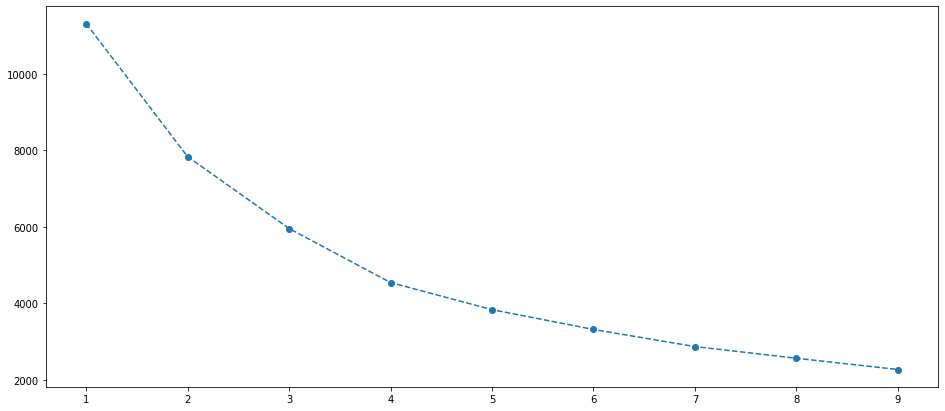

In [41]:
p=range(1,10)
plt.figure(figsize=(16,7))
plt.plot(p,sse,marker = 'o', linestyle = '--')
plt.show()

In [42]:
km=KMeans(n_clusters=4)
prediction=km.fit_predict(new_data)

In [43]:
prediction

array([3, 2, 1, ..., 1, 2, 1], dtype=int32)

In [44]:
pca_df['cluster']=prediction

In [45]:
pca_df.head()

,component1,component2,component3,cluster
0,2.514746,0.834122,2.174806,3
1,0.344935,0.598146,-2.211603,2
2,-0.651063,-0.680093,2.280419,1
3,1.714316,-0.579927,0.730731,0
4,1.626745,-0.440496,1.244909,0


In [46]:
df1=pca_df[pca_df['cluster']==0]
df2=pca_df[pca_df['cluster']==1]
df3=pca_df[pca_df['cluster']==2]
df4=pca_df[pca_df['cluster']==3]

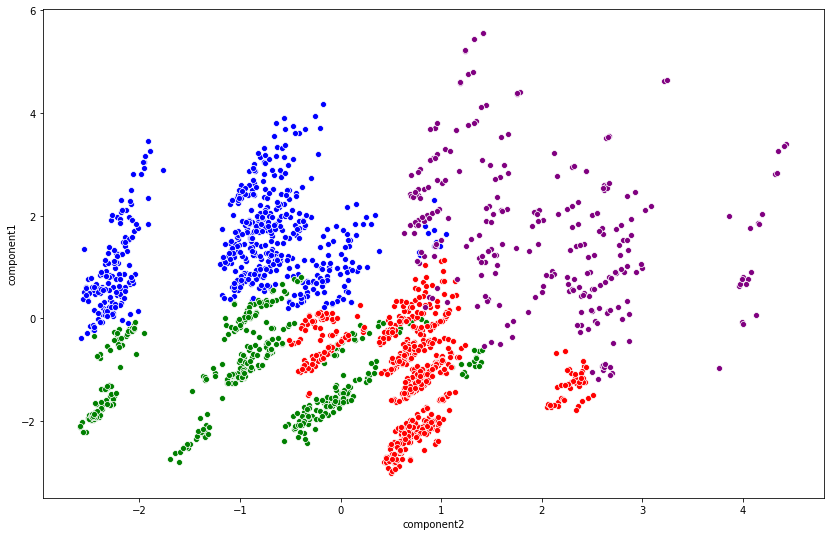

In [47]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='component2',y='component1',data=df1,color='blue')
sns.scatterplot(x='component2',y='component1',data=df2,color='green')
sns.scatterplot(x='component2',y='component1',data=df3,color='red')
sns.scatterplot(x='component2',y='component1',data=df4,color='purple')
plt.show()

### Now we can distinguish the clusters

### Saving the customer model

In [48]:
with open('scaler.pickle','wb') as f:
    pickle.dump(sc,f)

In [49]:
with open('pca.pickle','wb') as f:
    pickle.dump(pca,f)

In [50]:
with open('kmeans.pickle','wb') as f:
    pickle.dump(km,f)

## Completed customer segmentation Based on their features

### Loading Customer Purchase Data

![image.png](./docs/img/image.png)

In [51]:
purchase_df=pd.read_csv('purchase data.csv')

In [52]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [53]:
purchase_df.shape

(58693, 24)

In [54]:
purchase_df.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [55]:
purchase_df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Loading Models

In [56]:
with open('scaler.pickle','rb') as f:
    sc=pickle.load(f)

In [57]:
with open('kmeans.pickle','rb') as f:
    km=pickle.load(f)

In [58]:
with open('pca.pickle','rb') as f:
    pca=pickle.load(f)

### Using this model on purchase data set

In [59]:
features=purchase_df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
features.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,47,1,110866,1,0
1,0,0,47,1,110866,1,0
2,0,0,47,1,110866,1,0
3,0,0,47,1,110866,1,0
4,0,0,47,1,110866,1,0


### Scaling

In [60]:
purchase_standard=sc.transform(features)

### PCA

In [61]:
purchase_pca=pca.transform(purchase_standard)

### Applying Kmeans

In [62]:
prediction=km.predict(purchase_pca)

In [63]:
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [64]:
purchase_df['segment']=prediction

In [65]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


In [66]:
purchase_df['segment'].value_counts()

1    21495
0    13580
2    12123
3    11495
Name: segment, dtype: int64

### Applied the segmentation model on purchase dataset

In [67]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


# <center>Purchase Analysis</center>

## Data Analysis on purchase of customers

### Checking how many times a customer visits the store and number of times he buys something

In [68]:
#No of visits
temp=purchase_df.groupby('ID')['Day'].count()
temp1=pd.DataFrame(temp)

In [69]:
temp1=temp1.rename(columns={'Day':'n_vists'})
temp1.head()

,n_vists
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [70]:
# No of times he buys
temp=purchase_df.groupby('ID')['Incidence'].sum()
temp

ID
200000001     9
200000002    11
200000003    10
200000004    11
200000005    13
             ..
200000496    20
200000497    43
200000498    39
200000499    31
200000500    15
Name: Incidence, Length: 500, dtype: int64

In [71]:
temp1['n_purchase']=temp

In [72]:
temp1.head()

,n_vists,n_purchase
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


### Checking the avg purchase 

In [73]:
a=temp1['n_purchase']/temp1['n_vists']
a

ID
200000001    0.089109
200000002    0.126437
200000003    0.103093
200000004    0.129412
200000005    0.117117
               ...   
200000496    0.166667
200000497    0.358333
200000498    0.297710
200000499    0.292453
200000500    0.120968
Length: 500, dtype: float64

In [74]:
temp1['avg_purchase']=a
temp1.head()

,n_vists,n_purchase,avg_purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


### Dividing each customer into segments

In [75]:
a=purchase_df.groupby('ID')['segment'].mean()
a

ID
200000001    1
200000002    3
200000003    1
200000004    1
200000005    0
            ..
200000496    2
200000497    1
200000498    2
200000499    1
200000500    1
Name: segment, Length: 500, dtype: int32

In [76]:
temp1['segment']=a
temp1.head()

,n_vists,n_purchase,avg_purchase,segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,3
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,0


##  Data analysis of each customer segmemts

### Calculating no of customers in each segment 

In [77]:
n=temp1.shape[0]

In [78]:
percent=temp1['segment'].value_counts()/n*100
percent

1    37.8
0    22.0
2    20.6
3    19.6
Name: segment, dtype: float64

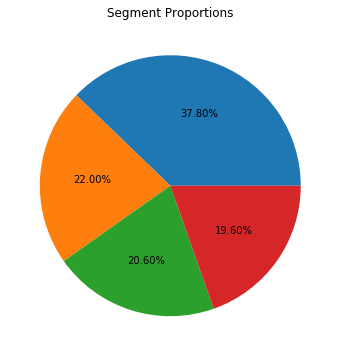

In [79]:
plt.figure(figsize=(10,6))
plt.pie(percent,autopct='%1.2f%%')
plt.title('Segment Proportions')
plt.show()

### Number of visits by each segment

In [80]:
a=temp1.groupby('segment')['n_vists'].mean()
a

segment
0    123.454545
1    113.730159
2    117.699029
3    117.295918
Name: n_vists, dtype: float64

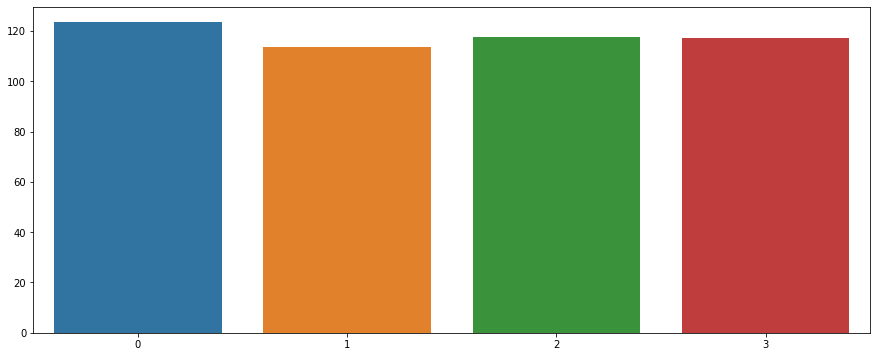

In [81]:
plt.figure(figsize=(15,6))
sns.barplot(x=[0,1,2,3],y=a.values)

### Number of purchase by each segments 

In [82]:
a=temp1.groupby('segment')['n_purchase'].mean()
a

segment
0    39.827273
1    22.756614
2    24.902913
3    34.602041
Name: n_purchase, dtype: float64

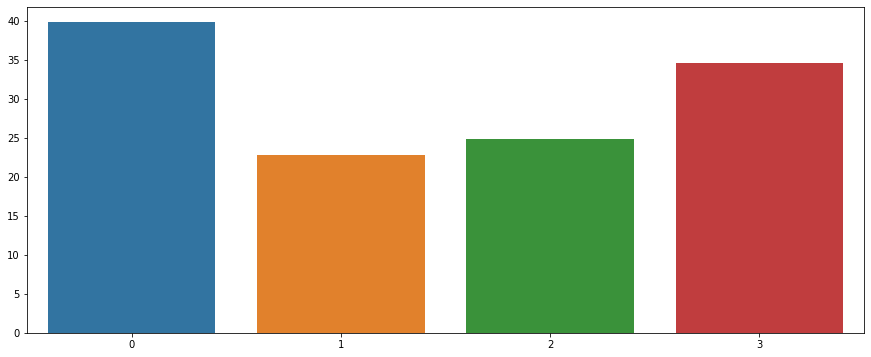

In [83]:
plt.figure(figsize=(15,6))
sns.barplot(x=[0,1,2,3],y=a.values)

## Brand Choice

In [84]:
# considering the brand choice who have made a single purchase
temp2=purchase_df[purchase_df['Incidence']==1]
temp2

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,1
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,1
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,1
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,1


In [85]:
temp3=temp2[['Brand','segment']]
temp3

,Brand,segment
6,2,1
11,5,1
19,1,1
24,4,1
29,2,1
...,...,...
58621,2,1
58648,1,1
58674,2,1
58687,2,1


In [86]:
#Choice of barnd for each segments
temp3.groupby('Brand')['segment'].value_counts()

Brand  segment
1      2           527
       1           508
       0           173
       3           142
2      1          2958
       2           908
       0           407
       3           269
3      2           521
       1           117
       0           115
       3            88
4      3          2189
       0           347
       1           264
       2           127
5      0          3339
       3           703
       2           482
       1           454
Name: segment, dtype: int64

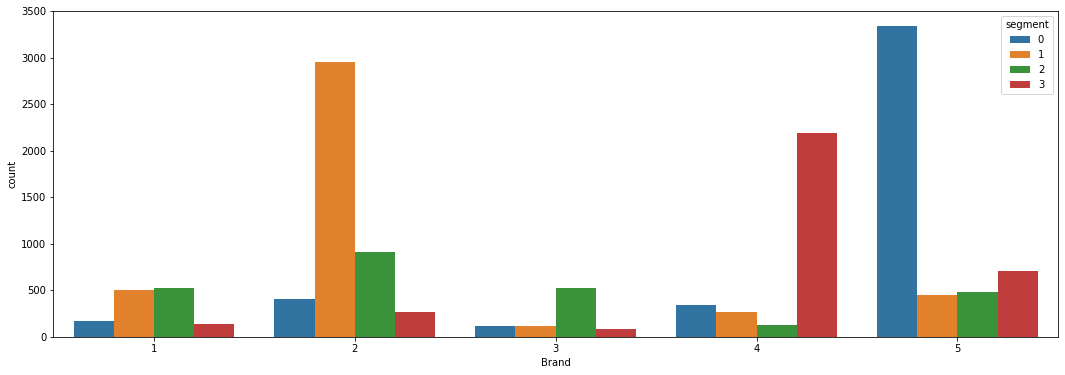

In [87]:
plt.figure(figsize=(18,6))
sns.countplot(x='Brand',data=temp3,hue='segment')

## Revenue and Price of each brand 

### Avg Price of each brand

In [88]:
p1=purchase_df['Price_1'].mean()
p1

1.3920743529893755

In [89]:
p2=purchase_df['Price_2'].mean()
p2

1.780998926618093

In [90]:
p3=purchase_df['Price_3'].mean()
p3

2.0067887141571523

In [91]:
p4=purchase_df['Price_4'].mean()
p4

2.159945308640629

In [92]:
p5=purchase_df['Price_5'].mean()
p5

2.654797676043362

In [93]:
temp4=pd.DataFrame(data=[p1,p2,p3,p4,p5],columns=["mean_price"])
temp4

,mean_price
0,1.392074
1,1.780999
2,2.006789
3,2.159945
4,2.654798


In [94]:
brand=['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
brand

['Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5']

In [95]:
temp4['brand']=brand

In [96]:
temp4.head()

,mean_price,brand
0,1.392074,Brand_1
1,1.780999,Brand_2
2,2.006789,Brand_3
3,2.159945,Brand_4
4,2.654798,Brand_5


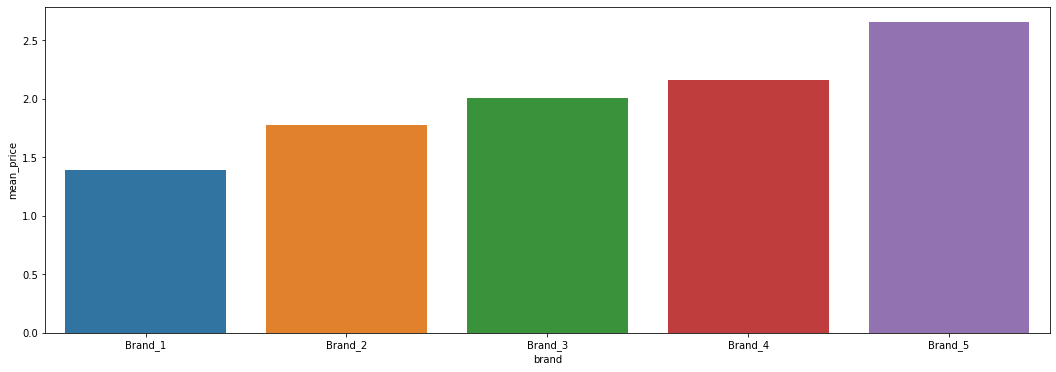

In [97]:
plt.figure(figsize=(18,6))
sns.barplot(x='brand',y='mean_price',data=temp4)

 Brand 5 seems to to most costly than other bands

### Revenue of each brand

Revenue can be defined as (price of each product) * (total quantity of product purchased) 

#### For Brand 1

In [98]:
x=purchase_df[purchase_df['Brand']==1]
y=x[['Price_1','Quantity','segment']]
y['Revenue_1']=y['Price_1']*y['Quantity']
y

,Price_1,Quantity,segment,Revenue_1
19,1.47,2,1,2.94
556,1.31,5,0,6.55
604,1.35,1,0,1.35
799,1.21,2,1,2.42
858,1.39,3,1,4.17
...,...,...,...,...
58400,1.10,3,2,3.30
58526,1.33,3,1,3.99
58527,1.34,3,1,4.02
58617,1.37,6,1,8.22


In [99]:
r1=y.groupby('segment')['Revenue_1'].sum()
r1

segment
0     736.09
1    2258.90
2    2611.19
3     699.47
Name: Revenue_1, dtype: float64

In [100]:
revenue_df=pd.DataFrame(r1)
revenue_df.head()

,Revenue_1
segment,
0,736.09
1,2258.90
2,2611.19
3,699.47


#### For Brand 2

In [101]:
x=purchase_df[purchase_df['Brand']==2]
y=x[['Price_2','Quantity','segment']]
y['Revenue_2']=y['Price_2']*y['Quantity']
y

,Price_2,Quantity,segment,Revenue_2
6,1.90,2,1,3.80
29,1.88,3,1,5.64
79,1.89,2,1,3.78
80,1.51,3,1,4.53
163,1.57,3,3,4.71
...,...,...,...,...
58615,1.26,4,1,5.04
58621,1.89,6,1,11.34
58674,1.85,7,1,12.95
58687,1.51,6,1,9.06


In [102]:
r2=y.groupby('segment')['Revenue_2'].sum()
r2

segment
0     1746.42
1    13955.14
2     4768.52
3     1298.23
Name: Revenue_2, dtype: float64

In [103]:
revenue_df=revenue_df.join(r2,on='segment')
revenue_df.head()

,Revenue_1,Revenue_2
segment,,
0,736.09,1746.42
1,2258.90,13955.14
2,2611.19,4768.52
3,699.47,1298.23


#### For Brand 3

In [104]:
x=purchase_df[purchase_df['Brand']==3]
y=x[['Price_3','Quantity','segment']]
y['Revenue_3']=y['Price_3']*y['Quantity']
y

,Price_3,Quantity,segment,Revenue_3
591,1.99,1,0,1.99
631,2.01,2,0,4.02
632,2.06,2,0,4.12
1220,2.02,2,1,4.04
2193,1.99,1,0,1.99
...,...,...,...,...
58431,2.07,3,2,6.21
58434,2.07,3,2,6.21
58435,2.01,4,2,8.04
58436,2.01,5,2,10.05


In [105]:
r3=y.groupby('segment')['Revenue_3'].sum()
r3

segment
0     664.75
1     716.25
2    3909.17
3     731.35
Name: Revenue_3, dtype: float64

In [106]:
revenue_df=revenue_df.join(r3,on='segment')
revenue_df.head()

,Revenue_1,Revenue_2,Revenue_3
segment,,,
0,736.09,1746.42,664.75
1,2258.90,13955.14,716.25
2,2611.19,4768.52,3909.17
3,699.47,1298.23,731.35


#### For Brand 4

In [107]:
x=purchase_df[purchase_df['Brand']==4]
y=x[['Price_4','Quantity','segment']]
y['Revenue_4']=y['Price_4']*y['Quantity']
y

,Price_4,Quantity,segment,Revenue_4
24,2.16,1,1,2.16
52,1.90,3,1,5.70
101,2.09,1,3,2.09
115,2.12,2,3,4.24
138,2.14,3,3,6.42
...,...,...,...,...
58320,2.24,3,1,6.72
58322,2.24,5,1,11.20
58323,2.24,3,1,6.72
58327,2.24,5,1,11.20


In [108]:
r4=y.groupby('segment')['Revenue_4'].sum()
r4

segment
0     2363.84
1     1629.31
2      861.38
3    14185.57
Name: Revenue_4, dtype: float64

In [109]:
revenue_df=revenue_df.join(r4,on='segment')
revenue_df.head()

,Revenue_1,Revenue_2,Revenue_3,Revenue_4
segment,,,,
0,736.09,1746.42,664.75,2363.84
1,2258.90,13955.14,716.25,1629.31
2,2611.19,4768.52,3909.17,861.38
3,699.47,1298.23,731.35,14185.57


#### For Brand 5

In [110]:
x=purchase_df[purchase_df['Brand']==5]
y=x[['Price_5','Quantity','segment']]
y['Revenue_5']=y['Price_5']*y['Quantity']
y

,Price_5,Quantity,segment,Revenue_5
11,2.62,1,1,2.62
97,2.79,1,1,2.79
209,2.49,1,1,2.49
212,2.44,1,1,2.44
291,2.62,1,1,2.62
...,...,...,...,...
58289,2.70,1,1,2.70
58471,2.62,1,1,2.62
58489,2.63,1,1,2.63
58506,2.64,2,1,5.28


In [111]:
r5=y.groupby('segment')['Revenue_5'].sum()
r5

segment
0    19441.06
1     2230.50
2     2439.75
3     5509.69
Name: Revenue_5, dtype: float64

In [112]:
revenue_df=revenue_df.join(r5,on='segment')
revenue_df.head()

,Revenue_1,Revenue_2,Revenue_3,Revenue_4,Revenue_5
segment,,,,,
0,736.09,1746.42,664.75,2363.84,19441.06
1,2258.90,13955.14,716.25,1629.31,2230.50
2,2611.19,4768.52,3909.17,861.38,2439.75
3,699.47,1298.23,731.35,14185.57,5509.69


In [113]:
revenue_df['total_revenue']=revenue_df['Revenue_1']+revenue_df['Revenue_2']+revenue_df['Revenue_3']+revenue_df['Revenue_4']+revenue_df['Revenue_5']

### Revenue of each brand from different segments

In [114]:
revenue_df.head()

,Revenue_1,Revenue_2,Revenue_3,Revenue_4,Revenue_5,total_revenue
segment,,,,,,
0,736.09,1746.42,664.75,2363.84,19441.06,24952.16
1,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


# <center>Predictive Analysis</center>

## <center>Price Elasticity Of Purchase Probability</center>

###  ->Price elasticity measures how a variable of interest changes when the price changes.

#### Price elasticity of Purchase Probability
![image.png](./docs/img/purchase.png)

In [115]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


### Bulding Logistic Regression Model for Purchase Probability

In [116]:
purchase_df['Mean_price']=(purchase_df['Price_1']+purchase_df['Price_2']+purchase_df['Price_3']+purchase_df['Price_4']+purchase_df['Price_5'])/5

In [117]:
x=purchase_df['Mean_price']
x=pd.DataFrame(x)
x

,Mean_price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030
...,...
58688,2.060
58689,2.060
58690,2.086
58691,2.092


In [118]:
y=purchase_df['Incidence']
y

0        0
1        0
2        0
3        0
4        0
        ..
58688    0
58689    0
58690    0
58691    1
58692    0
Name: Incidence, Length: 58693, dtype: int64

In [119]:
pr_model=LogisticRegression()

In [120]:
pr_model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
pr_model.coef_

array([[-2.3480548]])

### Price Elasticity of Purchase Probability

In [122]:
a=purchase_df[['Price_1','Price_2','Price_3','Price_4','Price_5','Mean_price']]
a.describe()

,Price_1,Price_2,Price_3,Price_4,Price_5,Mean_price
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798,1.998921
std,0.091139,0.170868,0.046867,0.089825,0.098272,0.051744
min,1.100000,1.260000,1.870000,1.760000,2.110000,1.872000
25%,1.340000,1.580000,1.970000,2.120000,2.630000,1.970000
50%,1.390000,1.880000,2.010000,2.170000,2.670000,2.004000
75%,1.470000,1.890000,2.060000,2.240000,2.700000,2.034000
max,1.590000,1.900000,2.140000,2.260000,2.800000,2.102000


 We can see that the values ragnges between 1.1 to 2.8

In [123]:
price_range=np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [124]:
price_range_df = pd.DataFrame(price_range)

In [125]:
price_range_df

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [126]:
prediction=pr_model.predict_proba(price_range_df)
#It gives two value the probability of no purchase and probability of purchase

In [127]:
purchase_probability=prediction[:,1]
purchase_probability

array([0.91789303, 0.91610596, 0.91428362, 0.91242548, 0.910531  ,
       0.90859965, 0.90663088, 0.90462415, 0.90257893, 0.90049467,
       0.89837085, 0.89620692, 0.89400234, 0.8917566 , 0.88946917,
       0.88713951, 0.88476711, 0.88235145, 0.87989203, 0.87738834,
       0.87483988, 0.87224617, 0.86960672, 0.86692105, 0.86418871,
       0.86140924, 0.85858219, 0.85570714, 0.85278366, 0.84981134,
       0.84678979, 0.84371863, 0.84059749, 0.83742604, 0.83420393,
       0.83093086, 0.82760652, 0.82423064, 0.82080297, 0.81732327,
       0.81379133, 0.81020696, 0.80657   , 0.80288029, 0.79913773,
       0.79534223, 0.79149372, 0.78759217, 0.78363757, 0.77962994,
       0.77556934, 0.77145585, 0.76728959, 0.76307071, 0.75879938,
       0.75447583, 0.7501003 , 0.74567308, 0.74119449, 0.73666488,
       0.73208466, 0.72745424, 0.7227741 , 0.71804474, 0.71326671,
       0.70844058, 0.70356699, 0.69864658, 0.69368006, 0.68866816,
       0.68361166, 0.67851138, 0.67336816, 0.66818289, 0.66295

In [128]:
price_range_df['Purchase_probability']=purchase_probability

In [129]:
price_range_df=price_range_df.rename(columns={0:"Price"})
price_range_df.head()

,Price,Purchase_probability
0,0.50,0.917893
1,0.51,0.916106
2,0.52,0.914284
3,0.53,0.912425
4,0.54,0.910531


### Calculating Price Elasticity

In [130]:
coef=pr_model.coef_[0][0]
coef

-2.348054804838444

In [131]:
pe=coef*price_range_df['Price']*(1-price_range_df['Purchase_probability'])
pe

0     -0.096396
1     -0.100464
2     -0.104659
3     -0.108984
4     -0.113442
         ...   
295   -8.012897
296   -8.038147
297   -8.063363
298   -8.088544
299   -8.113692
Length: 300, dtype: float64

In [132]:
price_range_df['Price_elasticity']=pe

In [133]:
price_range_df.head()

,Price,Purchase_probability,Price_elasticity
0,0.50,0.917893,-0.096396
1,0.51,0.916106,-0.100464
2,0.52,0.914284,-0.104659
3,0.53,0.912425,-0.108984
4,0.54,0.910531,-0.113442


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

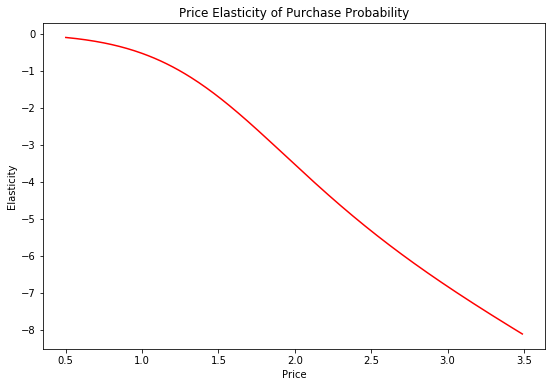

In [134]:
plt.figure(figsize = (9, 6))
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity'] ,color='red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Calculating Price Elasticity for each segments

## <font color="green"> For segment 0 </font>

In [135]:
seg_0_df=purchase_df[purchase_df['segment']==0]
mean_price=(seg_0_df['Price_1']+seg_0_df['Price_2']+seg_0_df['Price_3']+seg_0_df['Price_4']+seg_0_df['Price_5'])/5
x=pd.DataFrame(mean_price)
y=seg_0_df['Incidence']
pr_model_0=LogisticRegression()
pr_model_0.fit(x,y)
coef=pr_model_0.coef_[0][0]
p=price_range_df.iloc[:,0]
p=pd.DataFrame(p)
prediction=pr_model_0.predict_proba(p)
price_range_df['Purchase_probability_0']=prediction[:,1]

In [136]:
pe=coef*price_range_df['Price']*(1-price_range_df['Purchase_probability_0'])
pe

0     -0.119088
1     -0.123271
2     -0.127548
3     -0.131919
4     -0.136386
         ...   
295   -5.680837
296   -5.700994
297   -5.721114
298   -5.741197
299   -5.761245
Length: 300, dtype: float64

In [137]:
price_range_df['Price_elasticity_0']=pe
price_range_df.head()

,Price,Purchase_probability,Price_elasticity,Purchase_probability_0,Price_elasticity_0
0,0.50,0.917893,-0.096396,0.860871,-0.119088
1,0.51,0.916106,-0.100464,0.858808,-0.123271
2,0.52,0.914284,-0.104659,0.856719,-0.127548
3,0.53,0.912425,-0.108984,0.854605,-0.131919
4,0.54,0.910531,-0.113442,0.852465,-0.136386


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

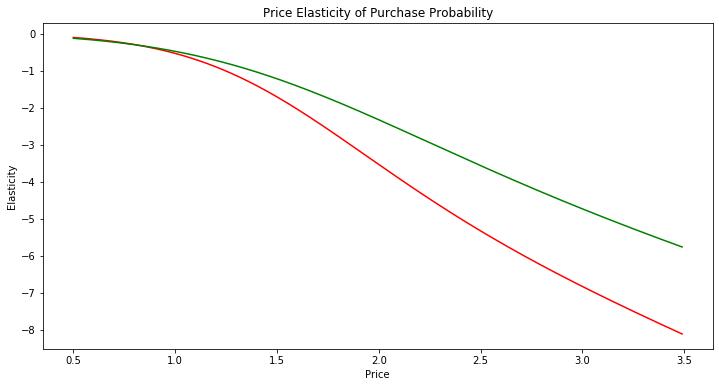

In [138]:
plt.figure(figsize = (12, 6))
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity'] ,color='red')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_0'] ,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## <font color="green"> For segment 1 </font>

In [139]:
seg_1_df=purchase_df[purchase_df['segment']==1]
mean_price=(seg_1_df['Price_1']+seg_1_df['Price_2']+seg_1_df['Price_3']+seg_1_df['Price_4']+seg_1_df['Price_5'])/5
x=pd.DataFrame(mean_price)
y=seg_1_df['Incidence']
pr_model_1=LogisticRegression()
pr_model_1.fit(x,y)
coef=pr_model_1.coef_[0][0]
p=price_range_df.iloc[:,0]
p=pd.DataFrame(p)
prediction=pr_model_1.predict_proba(p)
price_range_df['Purchase_probability_1']=prediction[:,1]

In [140]:
pe=coef*price_range_df['Price']*(1-price_range_df['Purchase_probability_1'])
pe

0      -0.030921
1      -0.032688
2      -0.034541
3      -0.036486
4      -0.038526
         ...    
295   -12.541785
296   -12.578702
297   -12.615602
298   -12.652486
299   -12.689354
Length: 300, dtype: float64

In [141]:
price_range_df['Price_elasticity_1']=pe
price_range_df.head()

,Price,Purchase_probability,Price_elasticity,Purchase_probability_0,Price_elasticity_0,Purchase_probability_1,Price_elasticity_1
0,0.50,0.917893,-0.096396,0.860871,-0.119088,0.983010,-0.030921
1,0.51,0.916106,-0.100464,0.858808,-0.123271,0.982391,-0.032688
2,0.52,0.914284,-0.104659,0.856719,-0.127548,0.981750,-0.034541
3,0.53,0.912425,-0.108984,0.854605,-0.131919,0.981087,-0.036486
4,0.54,0.910531,-0.113442,0.852465,-0.136386,0.980399,-0.038526


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

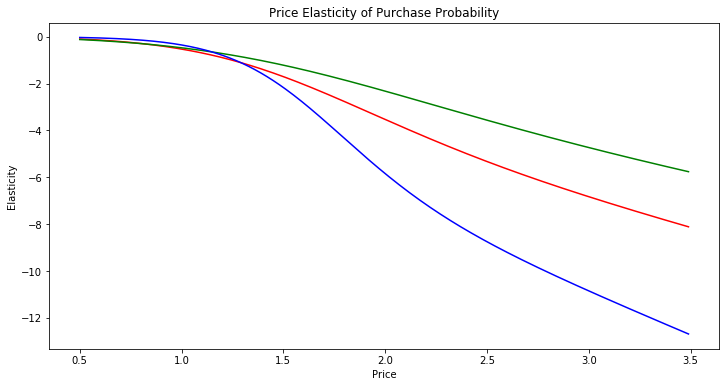

In [142]:
plt.figure(figsize = (12, 6))
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity'] ,color='red')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_0'] ,color='green')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_1'] ,color='blue')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## <font color="green"> For segment 2 </font>

In [143]:
seg_2_df=purchase_df[purchase_df['segment']==2]
mean_price=(seg_2_df['Price_1']+seg_2_df['Price_2']+seg_2_df['Price_3']+seg_2_df['Price_4']+seg_2_df['Price_5'])/5
x=pd.DataFrame(mean_price)
y=seg_2_df['Incidence']
pr_model_2=LogisticRegression()
pr_model_2.fit(x,y)
coef=pr_model_2.coef_[0][0]
p=price_range_df.iloc[:,0]
p=pd.DataFrame(p)
prediction=pr_model_2.predict_proba(p)
price_range_df['Purchase_probability_2']=prediction[:,1]

In [144]:
pe=coef*price_range_df['Price']*(1-price_range_df['Purchase_probability_2'])
pe

0     -0.211169
1     -0.217739
2     -0.224417
3     -0.231204
4     -0.238099
         ...   
295   -5.051673
296   -5.068529
297   -5.085366
298   -5.102185
299   -5.118986
Length: 300, dtype: float64

In [145]:
price_range_df['Price_elasticity_2']=pe
price_range_df.head()

,Price,Purchase_probability,Price_elasticity,Purchase_probability_0,Price_elasticity_0,Purchase_probability_1,Price_elasticity_1,Purchase_probability_2,Price_elasticity_2
0,0.50,0.917893,-0.096396,0.860871,-0.119088,0.983010,-0.030921,0.719981,-0.211169
1,0.51,0.916106,-0.100464,0.858808,-0.123271,0.982391,-0.032688,0.716930,-0.217739
2,0.52,0.914284,-0.104659,0.856719,-0.127548,0.981750,-0.034541,0.713859,-0.224417
3,0.53,0.912425,-0.108984,0.854605,-0.131919,0.981087,-0.036486,0.710769,-0.231204
4,0.54,0.910531,-0.113442,0.852465,-0.136386,0.980399,-0.038526,0.707658,-0.238099


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

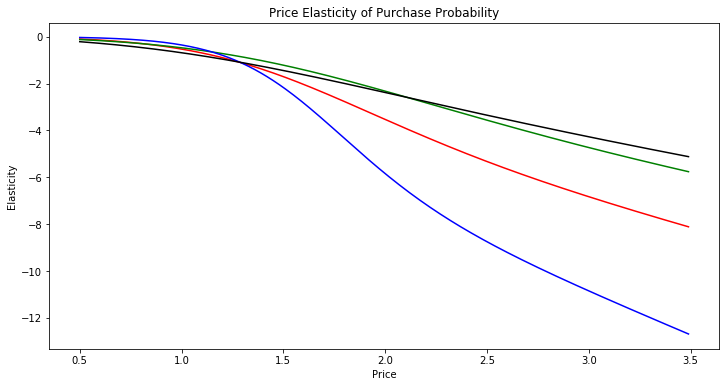

In [146]:
plt.figure(figsize = (12, 6))
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity'] ,color='red')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_0'] ,color='green')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_1'] ,color='blue')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_2'] ,color='black')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## <font color="green"> For segment 3 </font>

In [147]:
seg_3_df=purchase_df[purchase_df['segment']==3]
mean_price=(seg_3_df['Price_1']+seg_3_df['Price_2']+seg_3_df['Price_3']+seg_3_df['Price_4']+seg_3_df['Price_5'])/5
x=pd.DataFrame(mean_price)
y=seg_3_df['Incidence']
pr_model_3=LogisticRegression()
pr_model_3.fit(x,y)
coef=pr_model_3.coef_[0][0]
p=price_range_df.iloc[:,0]
p=pd.DataFrame(p)
prediction=pr_model_3.predict_proba(p)
price_range_df['Purchase_probability_3']=prediction[:,1]

In [148]:
pe=coef*price_range_df['Price']*(1-price_range_df['Purchase_probability_3'])
pe

0     -0.168042
1     -0.172967
2     -0.177962
3     -0.183027
4     -0.188165
         ...   
295   -4.022022
296   -4.036889
297   -4.051739
298   -4.066574
299   -4.081392
Length: 300, dtype: float64

In [149]:
price_range_df['Price_elasticity_3']=pe
price_range_df.head()

,Price,Purchase_probability,Price_elasticity,Purchase_probability_0,Price_elasticity_0,Purchase_probability_1,Price_elasticity_1,Purchase_probability_2,Price_elasticity_2,Purchase_probability_3,Price_elasticity_3
0,0.50,0.917893,-0.096396,0.860871,-0.119088,0.983010,-0.030921,0.719981,-0.211169,0.730224,-0.168042
1,0.51,0.916106,-0.100464,0.858808,-0.123271,0.982391,-0.032688,0.716930,-0.217739,0.727763,-0.172967
2,0.52,0.914284,-0.104659,0.856719,-0.127548,0.981750,-0.034541,0.713859,-0.224417,0.725288,-0.177962
3,0.53,0.912425,-0.108984,0.854605,-0.131919,0.981087,-0.036486,0.710769,-0.231204,0.722798,-0.183027
4,0.54,0.910531,-0.113442,0.852465,-0.136386,0.980399,-0.038526,0.707658,-0.238099,0.720295,-0.188165


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

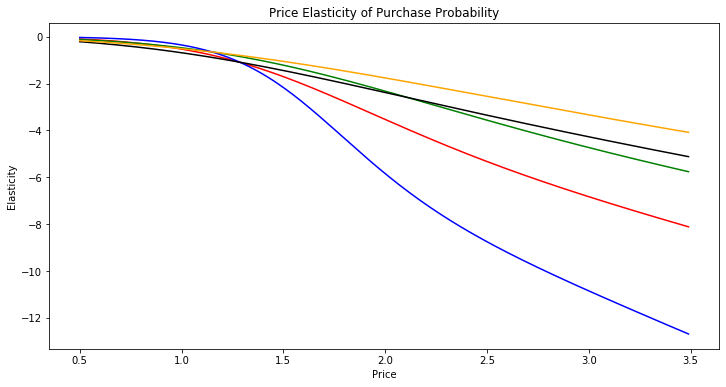

In [150]:
plt.figure(figsize = (12, 6))
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity'] ,color='red')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_0'] ,color='green')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_1'] ,color='blue')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_2'] ,color='black')
plt.plot(price_range_df['Price'],price_range_df['Price_elasticity_3'] ,color='orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature

In [151]:
Mean_promotion=(purchase_df['Promotion_1']+purchase_df['Promotion_2']+purchase_df['Promotion_3']+purchase_df['Promotion_4']+purchase_df['Promotion_5'])/5

In [152]:
x=purchase_df['Mean_price']
x=pd.DataFrame(x)
x

,Mean_price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030
...,...
58688,2.060
58689,2.060
58690,2.086
58691,2.092


In [153]:
x['promotion']=Mean_promotion
x

,Mean_price,promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
...,...,...
58688,2.060,0.2
58689,2.060,0.0
58690,2.086,0.0
58691,2.092,0.0


In [154]:
y=purchase_df['Incidence']
y

0        0
1        0
2        0
3        0
4        0
        ..
58688    0
58689    0
58690    0
58691    1
58692    0
Name: Incidence, Length: 58693, dtype: int64

In [155]:
promo_model=LogisticRegression()

In [156]:
promo_model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
promo_model.coef_

array([[-1.49402641,  0.56152541]])

In [158]:
coef=promo_model.coef_[0][0]
coef

-1.494026412813302

## Price Elasticity with Promotion

In [159]:
promo_df=price_range_df['Price']
promo_df=pd.DataFrame(promo_df)

In [160]:
promo_df['promotion']=1

In [161]:
promo_df

,Price,promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
...,...,...
295,3.45,1
296,3.46,1
297,3.47,1
298,3.48,1


In [162]:
prediction=promo_model.predict_proba(promo_df)

In [163]:
promo = prediction[:, 1]
pe=coef*promo_df['Price']*(1-promo)
pe

0     -0.125732
1     -0.129848
2     -0.134043
3     -0.138318
4     -0.142674
         ...   
295   -4.861622
296   -4.879824
297   -4.897996
298   -4.916137
299   -4.934247
Name: Price, Length: 300, dtype: float64

In [164]:
promo_df['promotion_elasticity']=pe
promo_df.head()

,Price,promotion,promotion_elasticity
0,0.50,1,-0.125732
1,0.51,1,-0.129848
2,0.52,1,-0.134043
3,0.53,1,-0.138318
4,0.54,1,-0.142674


## Price Elasticity without Promotion

In [165]:
no_promo_df=price_range_df['Price']
no_promo_df=pd.DataFrame(no_promo_df)

In [166]:
no_promo_df['promotion']=0

In [167]:
no_promo_df

,Price,promotion
0,0.50,0
1,0.51,0
2,0.52,0
3,0.53,0
4,0.54,0
...,...,...
295,3.45,0
296,3.46,0
297,3.47,0
298,3.48,0


In [168]:
prediction=promo_model.predict_proba(no_promo_df)

In [169]:
no_promo = prediction[:, 1]
pe=coef*no_promo_df['Price']*(1-no_promo)
pe

0     -0.195644
1     -0.201765
2     -0.207989
3     -0.214316
4     -0.220747
         ...   
295   -4.983237
296   -5.000143
297   -5.017029
298   -5.033896
299   -5.050743
Name: Price, Length: 300, dtype: float64

In [170]:
no_promo_df['promotion_elasticity']=pe
promo_df.head()

,Price,promotion,promotion_elasticity
0,0.50,1,-0.125732
1,0.51,1,-0.129848
2,0.52,1,-0.134043
3,0.53,1,-0.138318
4,0.54,1,-0.142674


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability With and without promotions')

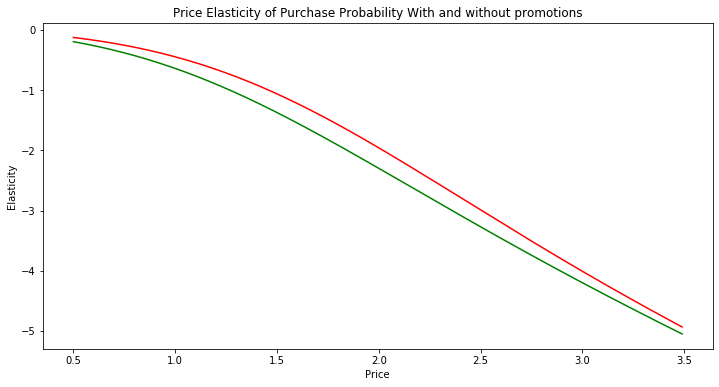

In [171]:
plt.figure(figsize = (12, 6))
plt.plot(promo_df['Price'],promo_df['promotion_elasticity'] ,color='red')
plt.plot(no_promo_df['Price'],no_promo_df['promotion_elasticity'] ,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability With and without promotions')

According to  model people are more likely to buy a product if there is some promotional activity rather than purchase a product with the same price, when it isn't on promotion. 